For this assingment on unsupervised machine learning I chose the white wines dataset.
Let's begin the exploration.

Importing the necessary Libraries, modules, and dependancies

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Reading the dataset and taking a look at it

In [131]:
wine_df = pd.read_csv("winequality-white.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Checking if the data types make sense

In [132]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Taking a look at more info to see in a glance for possible outliers and anything out of the ordinary

In [133]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Checking for null values

In [134]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Making a heatmap of the correlations between our features to search for any important relationships

<AxesSubplot: >

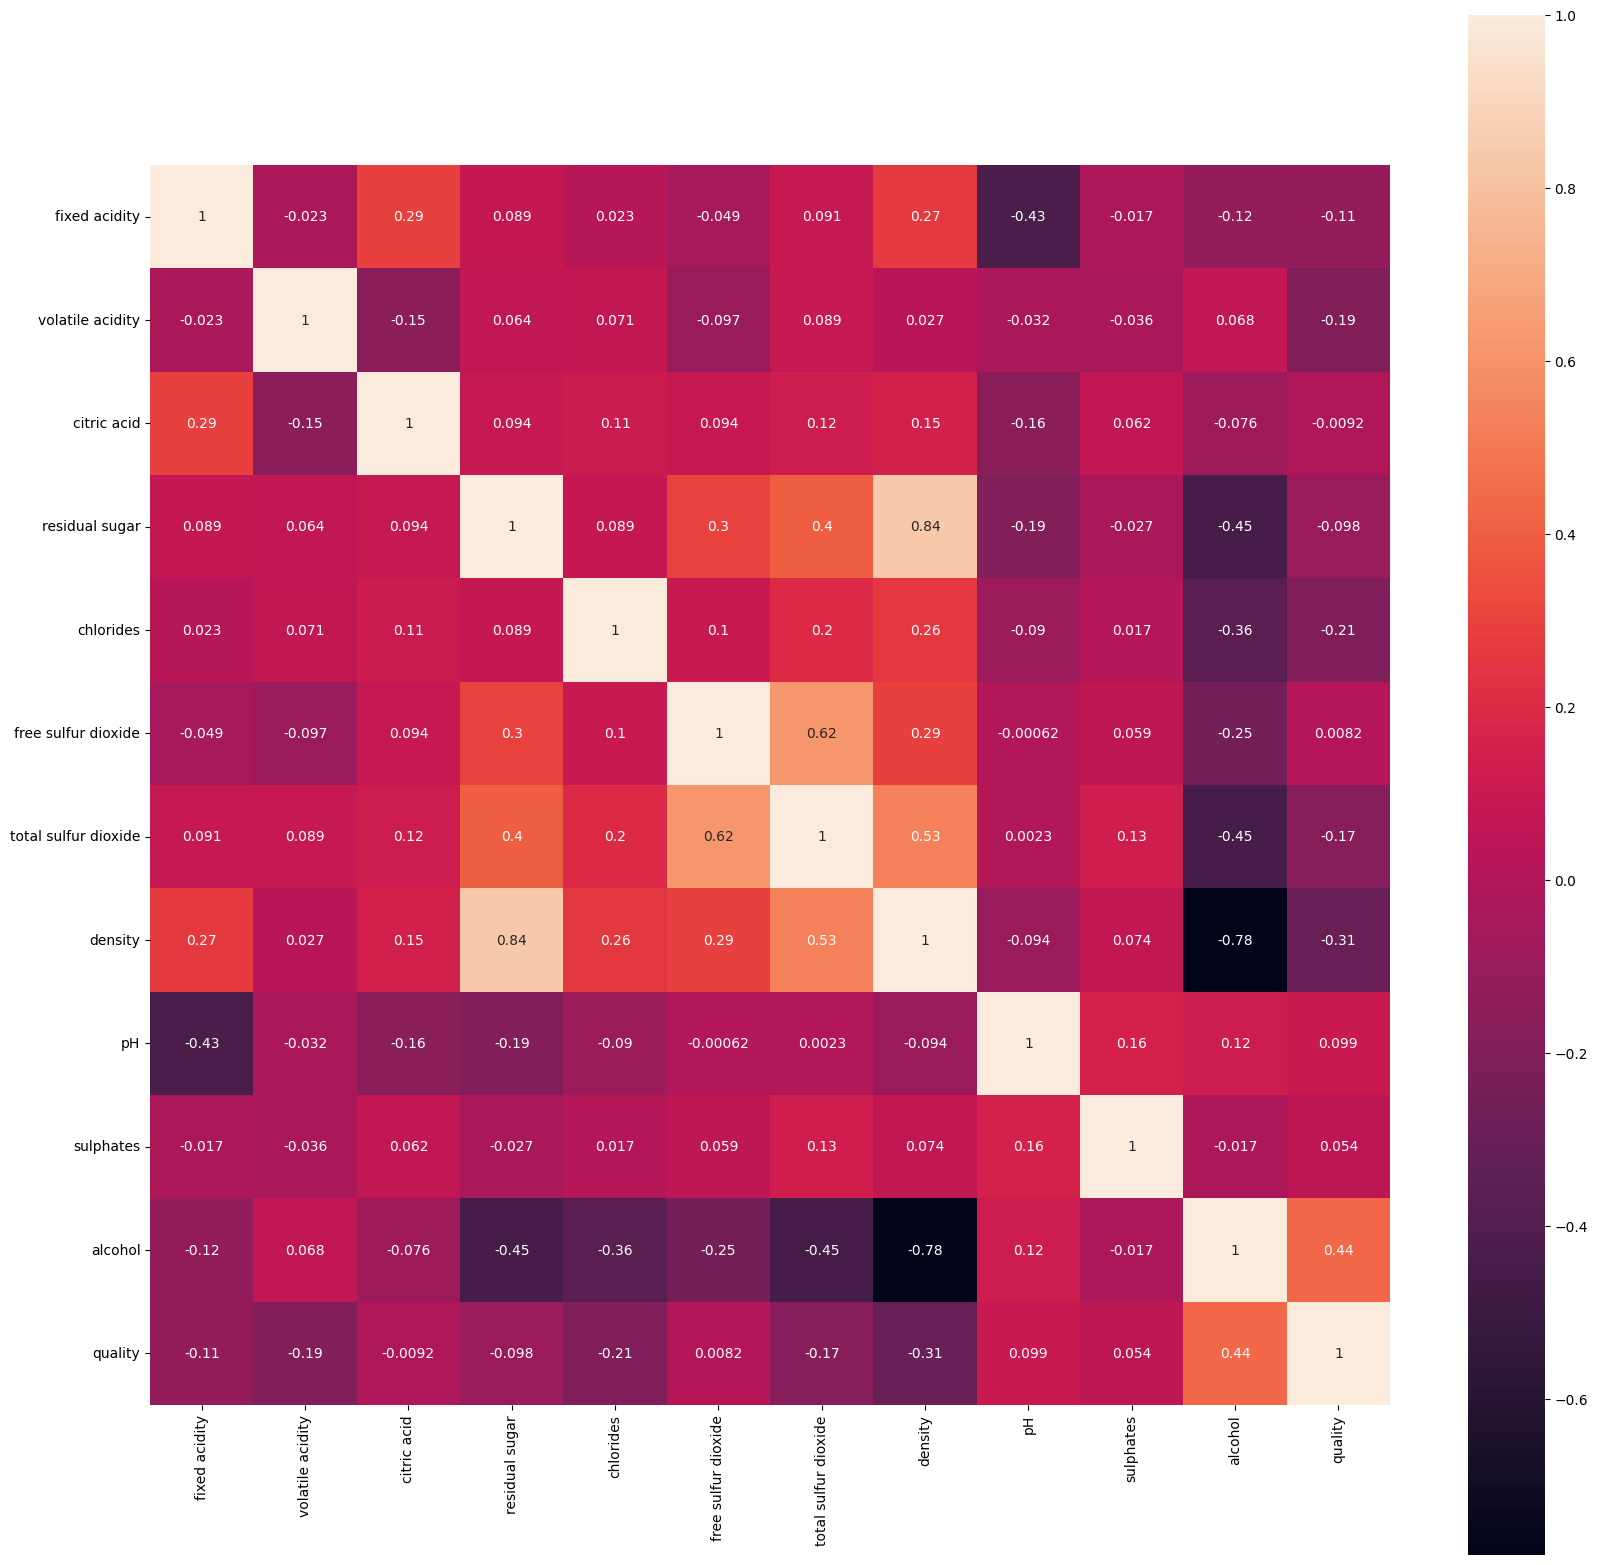

In [135]:
plt.figure(figsize= (20,20))
sns.heatmap(wine_df.corr(), cmap="rocket",  annot=True, square=True)

We should also take a look at the distribution of the data

array([[<AxesSubplot: title={'center': 'fixed acidity'}>,
        <AxesSubplot: title={'center': 'volatile acidity'}>,
        <AxesSubplot: title={'center': 'citric acid'}>],
       [<AxesSubplot: title={'center': 'residual sugar'}>,
        <AxesSubplot: title={'center': 'chlorides'}>,
        <AxesSubplot: title={'center': 'free sulfur dioxide'}>],
       [<AxesSubplot: title={'center': 'total sulfur dioxide'}>,
        <AxesSubplot: title={'center': 'density'}>,
        <AxesSubplot: title={'center': 'pH'}>],
       [<AxesSubplot: title={'center': 'sulphates'}>,
        <AxesSubplot: title={'center': 'alcohol'}>,
        <AxesSubplot: title={'center': 'quality'}>]], dtype=object)

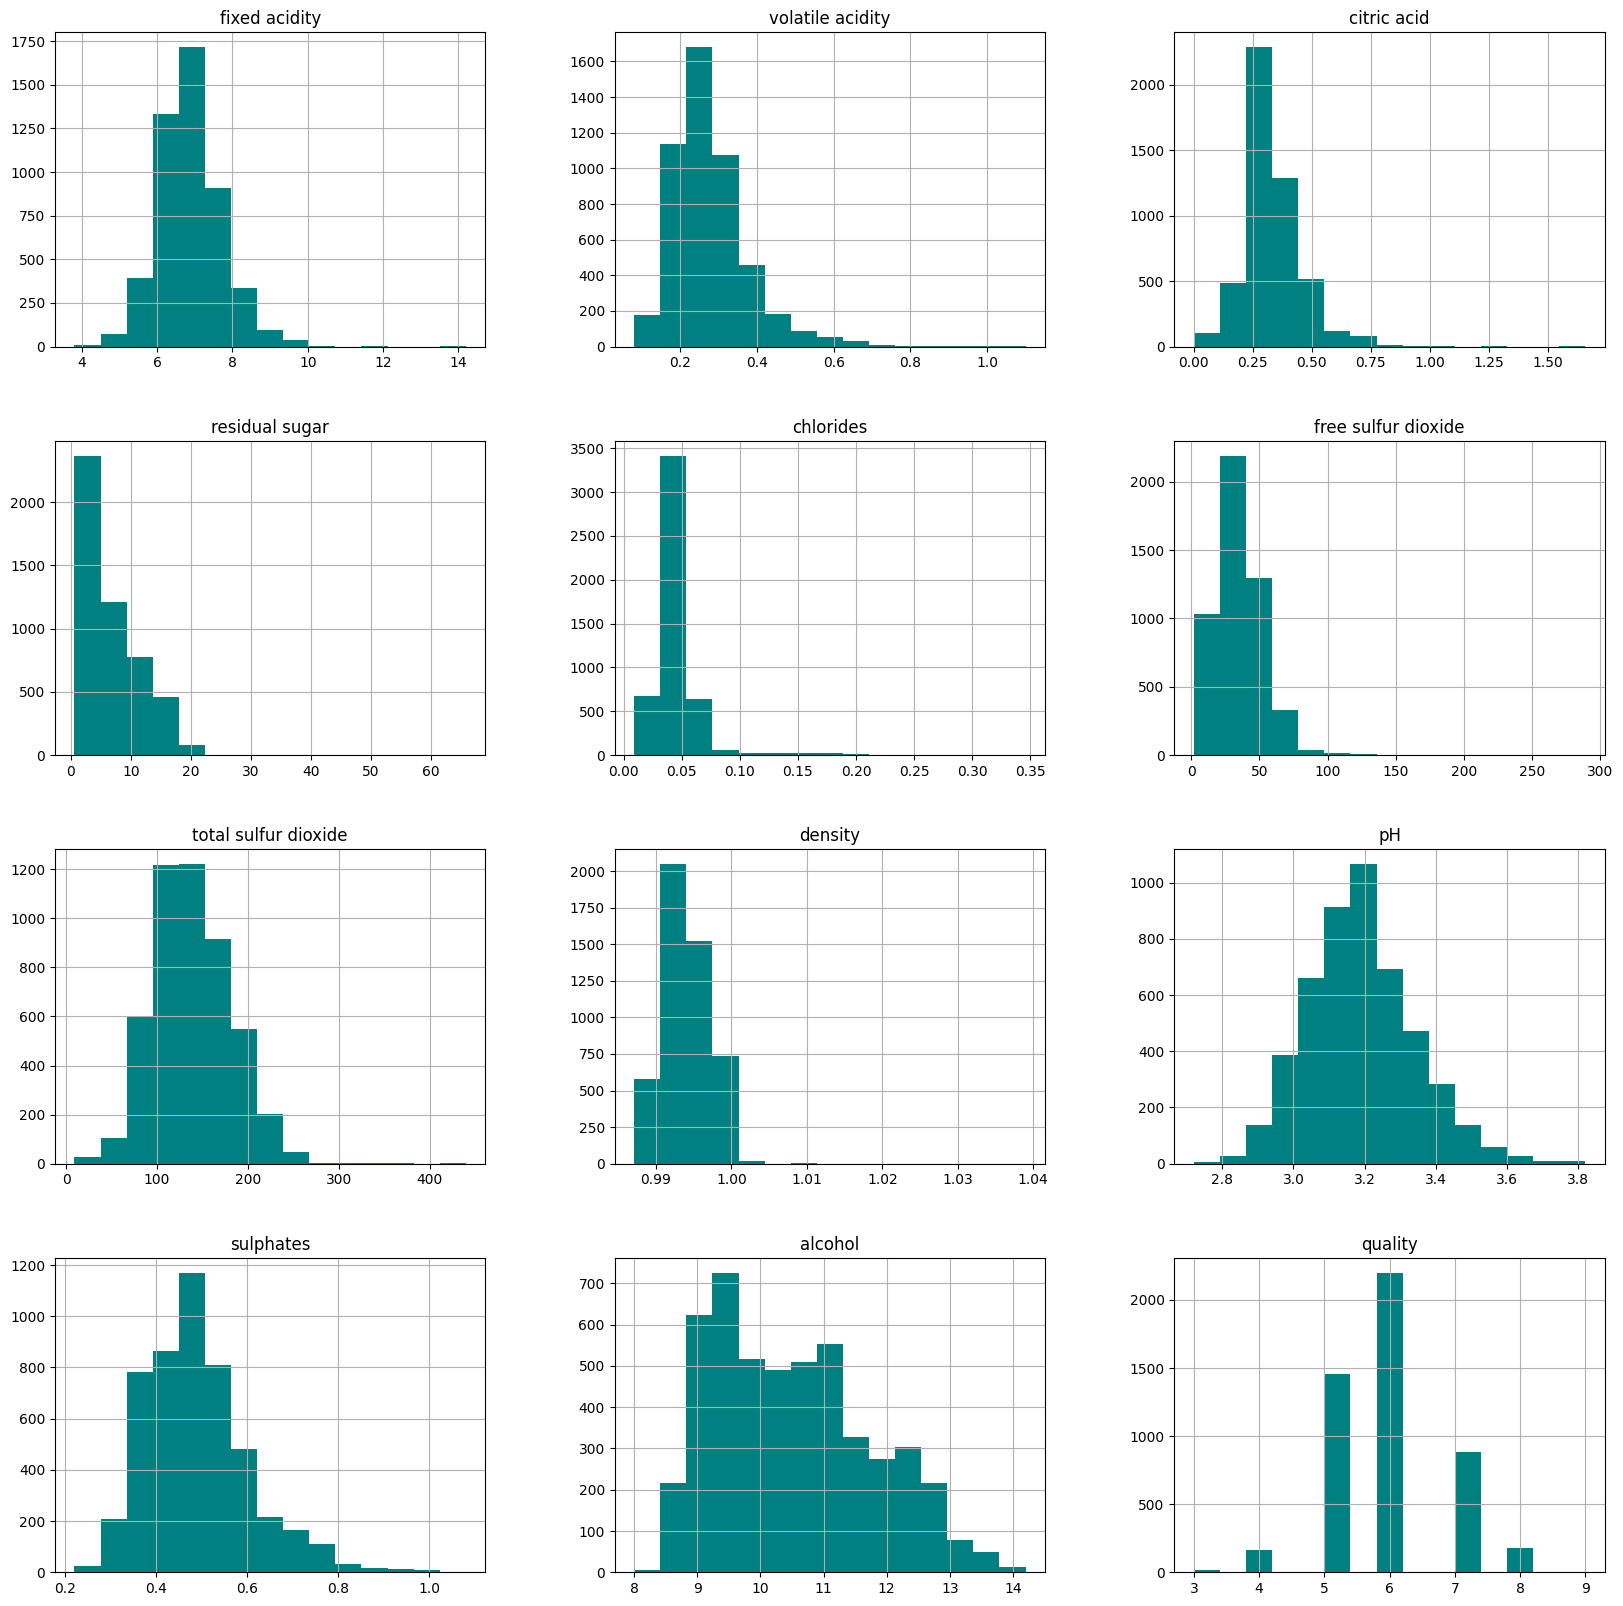

In [136]:
wine_df.hist(figsize=(20,20), bins =15, color="teal")

We can do a box plot of all the features to see the outliers more clearly and decide what to do with them

<AxesSubplot: >

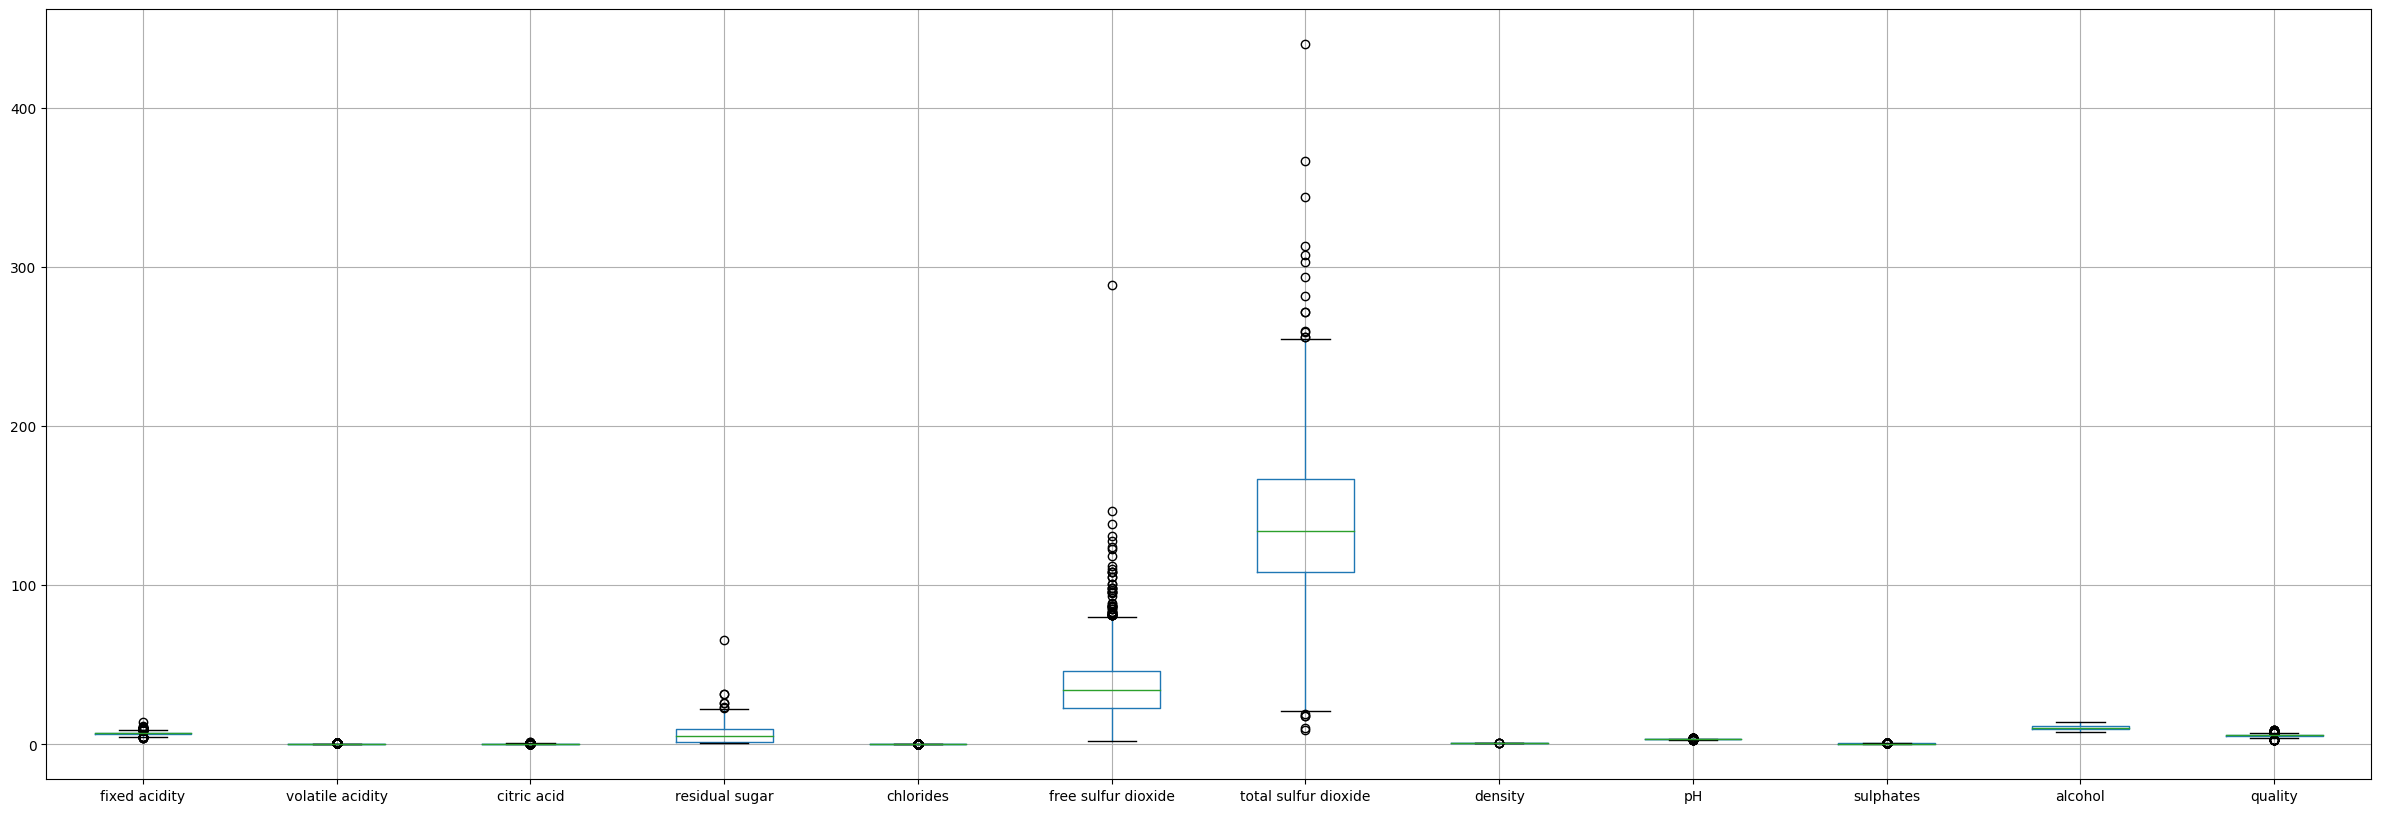

In [137]:
wine_df.boxplot(figsize=(30,10))

As we can see there are lots of outliers in some of the columns so we should treat them.

We will do some treatment on the 'redidual sugar', 'free sulfur dioxide' and 'total sulfur dioxide' columns that seem the most unatural outliers.

In [138]:
print(wine_df['residual sugar'].skew())

print(wine_df['residual sugar'].quantile(0.10))
print(wine_df['residual sugar'].quantile(0.90))

wine_df["residual sugar"] = np.where(wine_df["residual sugar"] <1.2, 1.2,wine_df['residual sugar'])
wine_df["residual sugar"] = np.where(wine_df["residual sugar"] >14.0, 14.0,wine_df['residual sugar'])
print(wine_df['residual sugar'].skew())

1.0770937564240868
1.2
14.0
0.4799661901317822


In [139]:
print(wine_df['free sulfur dioxide'].skew())

print(wine_df['free sulfur dioxide'].quantile(0.10))
print(wine_df['free sulfur dioxide'].quantile(0.90))

wine_df["free sulfur dioxide"] = np.where(wine_df["free sulfur dioxide"]<15.0, 15.0, wine_df["free sulfur dioxide"])
wine_df["free sulfur dioxide"] = np.where(wine_df["free sulfur dioxide"]>57.0, 57.0, wine_df["free sulfur dioxide"])
print(wine_df["free sulfur dioxide"].skew())

1.4067449205303078
15.0
57.0
0.1846825000849415


In [140]:
print(wine_df['total sulfur dioxide'].skew())

print(wine_df['total sulfur dioxide'].quantile(0.10))
print(wine_df['total sulfur dioxide'].quantile(0.90))

wine_df["total sulfur dioxide"] = np.where(wine_df["total sulfur dioxide"]<87.0, 87.0, wine_df["total sulfur dioxide"])
wine_df["total sulfur dioxide"] = np.where(wine_df["total sulfur dioxide"]>195.0, 195.0, wine_df["total sulfur dioxide"])
print(wine_df["total sulfur dioxide"].skew())

0.3907098416536745
87.0
195.0
0.1793793921736009


Let's run the box plots again and see what happened

<AxesSubplot: >

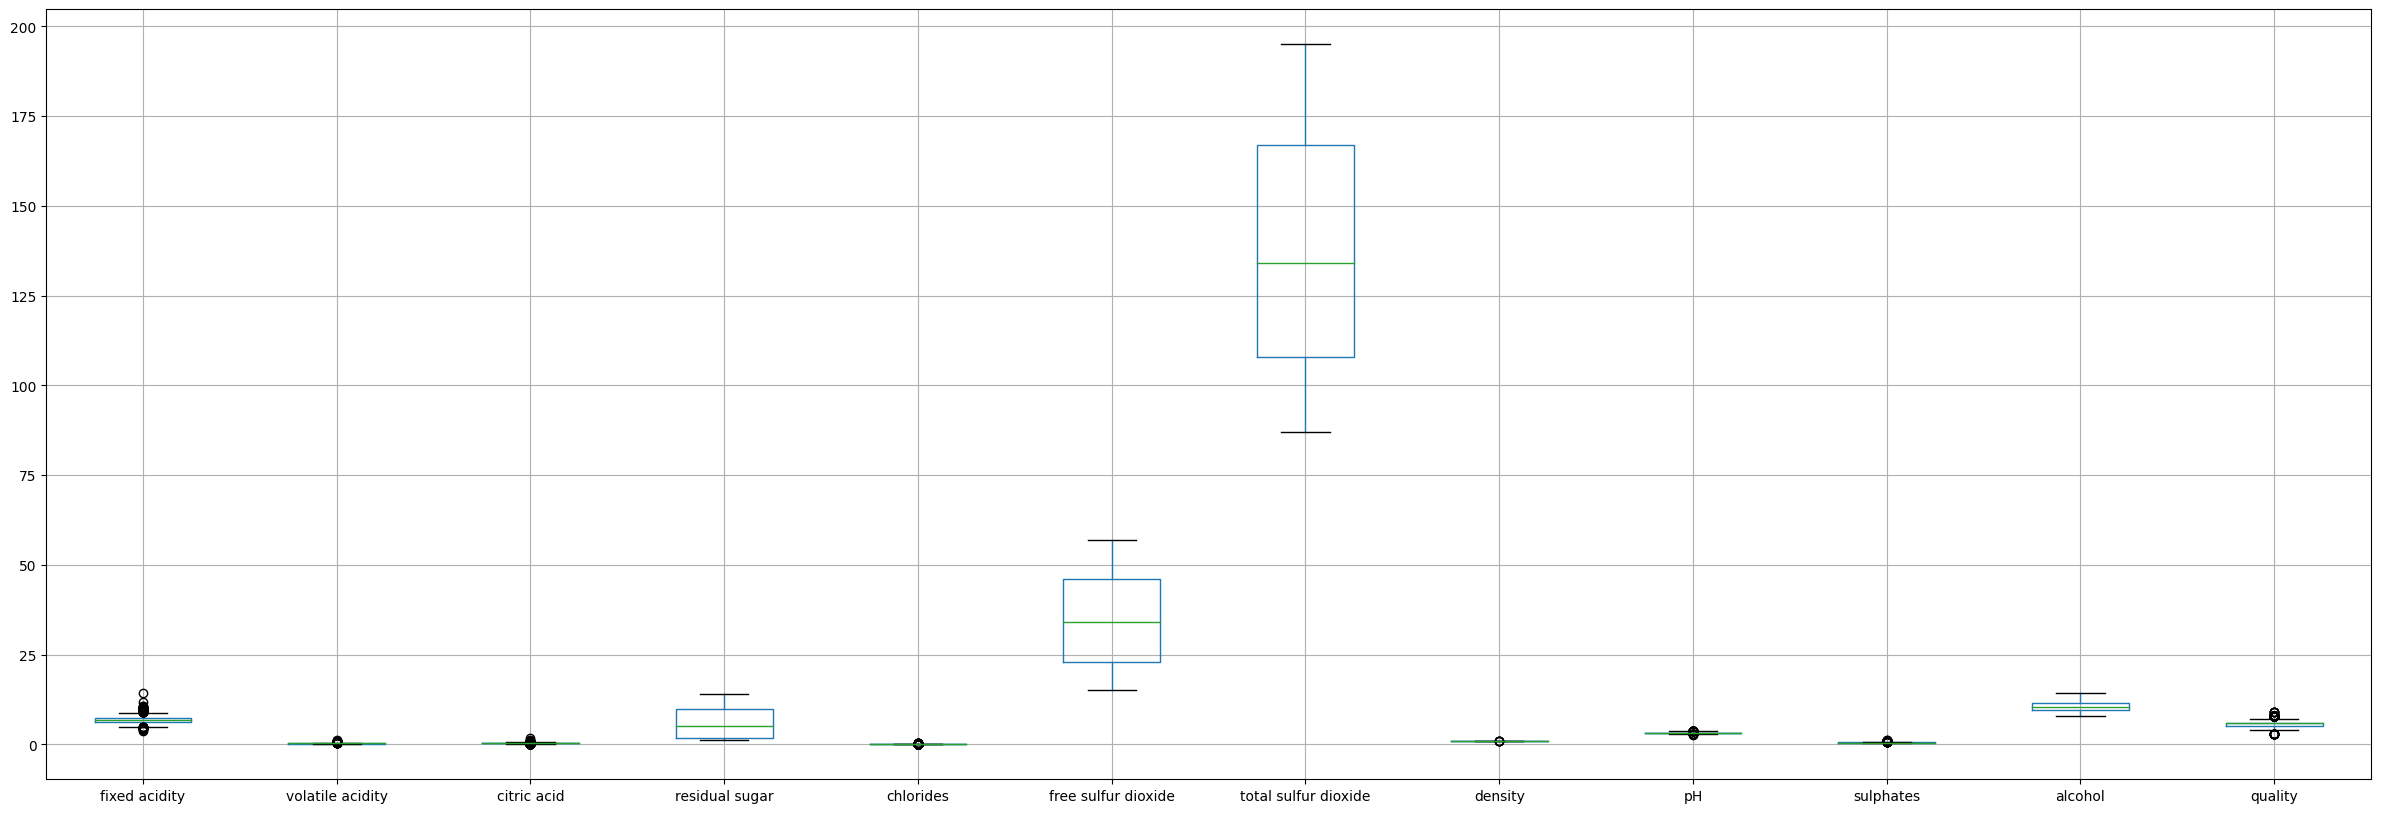

In [141]:
wine_df.boxplot(figsize=(30,10))

We can see a strong correlation between the alcohol volume and the quality so we can draw a line plot to see if this is generally the case.
That is just one example of how we can go into more detail from our previous steps into some conclusions.

<AxesSubplot: xlabel='alcohol', ylabel='quality'>

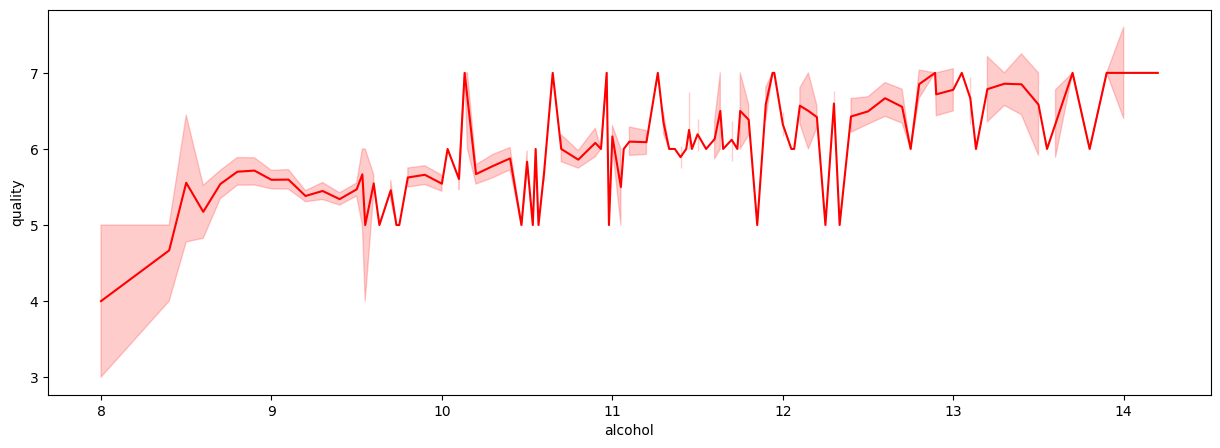

In [142]:
plt.figure(figsize=(15,5))
sns.lineplot(data=wine_df, x="alcohol", y="quality", color="red")

Scaling the data

In [143]:
scaler = StandardScaler()
wine_df2=scaler.fit_transform(wine_df)

We will use a KMeans algorithm, so let's train it and print some results.

In [145]:
kmeans = KMeans(n_clusters = 3, n_init=15)
y_kmeans = kmeans.fit_predict(wine_df2)

print("WCSS: ", kmeans.inertia_)
print("Iternations until converged: ", kmeans.n_iter_)
print("Final centroids: ")
print(kmeans.cluster_centers_)
print("Cluster assignments ")
print(kmeans.labels_)

WCSS:  42884.41031721386
Iternations until converged:  24
Final centroids: 
[[-0.53021452 -0.11621333 -0.17362097 -0.58880586 -0.39114737 -0.19351141
  -0.50278756 -0.83722008  0.4704436   0.14628429  0.86386229  0.71306082]
 [ 0.10393034  0.02548083  0.19321899  0.94663737  0.31383038  0.72953622
   0.85968293  0.97551435 -0.16889141  0.07311441 -0.78400449 -0.30172623]
 [ 0.57019878  0.12119423 -0.03622034 -0.5308844   0.08851229 -0.76046027
  -0.52522635 -0.23598526 -0.39853728 -0.29986636 -0.06818148 -0.54002216]]
Cluster assignments 
[1 2 2 ... 2 0 0]


Text(0.5, 1.0, 'K-Means clustering')

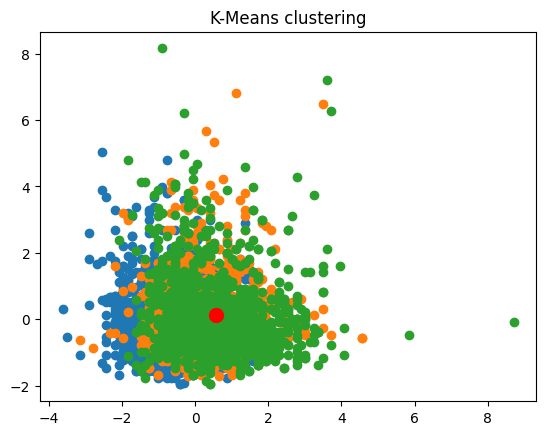

In [146]:
fig, ax = plt.subplots()
idxs = np.unique(kmeans.labels_)

for i in idxs:
    #Points of cluster
    points = wine_df2[kmeans.labels_==i,:]
    #Plot points
    plt.scatter(points[:,0], points[:,1])
    #Plot centroids
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')
    
ax.set_title('K-Means clustering')